### Importación de paquetes y funciones

In [1]:
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

%config InlineBackend.figure_format = 'retina'

In [2]:
colors = ['lightcoral',
          'brown',
          'lightseagreen',
          'maroon',
          'deeppink',
          'darkorange',
          'royalblue',
          'darkviolet',
          'gold',
          'crimson',
          'lightsteelblue',
          'salmon',
          'mediumseagreen',
          'olivedrab',
          'blue',
          'limegreen',
          'slateblue',
          'red',
          'steelblue',
          'teal',
          'peru',
          'dimgray',
          'violet',
          'cyan']

### Importación de data y cambio de index por ID de paciente

In [3]:
#importando
data = pd.read_csv("lung_cancer.csv", index_col='index')

#ahora index es el id
data.drop("Patient Id", axis=1, inplace=True)

#limpiando el campo nombres:
data.rename(columns=str.lower, inplace=True)
data.rename(columns={col: col.replace(" ", "_") for col in data.columns}, 
           inplace = True)

display(data)

age  gender  air_pollution  alcohol_use  dust_allergy   
index                                                          
0       33       1              2            4             5  \
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   
...    ...     ...            ...          ...           ...   
995     44       1              6            7             7   
996     37       2              6            8             7   
997     25       2              4            5             6   
998     18       2              6            8             7   
999     47       1              6            5             6   

       occupational_hazards  genetic_risk  chronic_lung_disease   
index                                                             
0                         4             3                     2  \
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   
...                     ...           ...                   ...   
995                       7             7                     6   
996                       7             7                     6   
997                       5             5                     4   
998                       7             7                     6   
999                       5             5                     4   

       balanced_diet  obesity  ...  fatigue  weight_loss  shortness_of_breath   
index                          ...                                              
0                  2        4  ...        3            4                    2  \
1                  2        2  ...        1            3                    7   
2                  6        7  ...        8            7                    9   
3                  7        7  ...        4            2                    3   
4                  7        7  ...        3            2                    4   
...              ...      ...  ...      ...          ...                  ...   
995                7        7  ...        5            3                    2   
996                7        7  ...        9            6                    5   
997                6        7  ...        8            7                    9   
998                7        7  ...        3            2                    4   
999                6        7  ...        8            7                    9   

       wheezing  swallowing_difficulty  clubbing_of_finger_nails   
index                                                              
0             2                      3                         1  \
1             8                      6                         2   
2             2                      1                         4   
3             1                      4                         5   
4             1                      4                         2   
...         ...                    ...                       ...   
995           7                      8                         2   
996           7                      2                         4   
997           2                      1                         4   
998           1                      4                         2   
999           2                      1                         4   

       frequent_cold  dry_cough  snoring   level  
index                                             
0                  2          3        4     Low  
1                  1          7        2  Medium  
2                  6          7        2    High  
3                  6          7        5    High  
4                  4          2        3    High  
...   

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                   1000

In [5]:
#cambiamos el nivel por números:
data["level"].replace({'High':2, 'Medium':1, 'Low':0}, inplace=True)

In [6]:
# Hacer Describe pero TRANSPUESTO!
data.describe().iloc[1:,].T

mean        std   min    25%   50%   75%   max
age                       37.174  12.005493  14.0  27.75  36.0  45.0  73.0
gender                     1.402   0.490547   1.0   1.00   1.0   2.0   2.0
air_pollution              3.840   2.030400   1.0   2.00   3.0   6.0   8.0
alcohol_use                4.563   2.620477   1.0   2.00   5.0   7.0   8.0
dust_allergy               5.165   1.980833   1.0   4.00   6.0   7.0   8.0
occupational_hazards       4.840   2.107805   1.0   3.00   5.0   7.0   8.0
genetic_risk               4.580   2.126999   1.0   2.00   5.0   7.0   7.0
chronic_lung_disease       4.380   1.848518   1.0   3.00   4.0   6.0   7.0
balanced_diet              4.491   2.135528   1.0   2.00   4.0   7.0   7.0
obesity                    4.465   2.124921   1.0   3.00   4.0   7.0   7.0
smoking                    3.948   2.495902   1.0   2.00   3.0   7.0   8.0
passive_smoker             4.195   2.311778   1.0   2.00   4.0   7.0   8.0
chest_pain                 4.438   2.280209   1.0   2.00   4.0   7.0   9.0
coughing_of_blood          4.859   2.427965   1.0   3.00   4.0   7.0   9.0
fatigue                    3.856   2.244616   1.0   2.00   3.0   5.0   9.0
weight_loss                3.855   2.206546   1.0   2.00   3.0   6.0   8.0
shortness_of_breath        4.240   2.285087   1.0   2.00   4.0   6.0   9.0
wheezing                   3.777   2.041921   1.0   2.00   4.0   5.0   8.0
swallowing_difficulty      3.746   2.270383   1.0   2.00   4.0   5.0   8.0
clubbing_of_finger_nails   3.923   2.388048   1.0   2.00   4.0   5.0   9.0
frequent_cold              3.536   1.832502   1.0   2.00   3.0   5.0   7.0
dry_cough                  3.853   2.039007   1.0   2.00   4.0   6.0   7.0
snoring                    2.926   1.474686   1.0   2.00   3.0   4.0   7.0
level                      1.062   0.815365   0.0   0.00   1.0   2.0   2.0

In [7]:
#variables independientes y dependiente

x = data.drop(columns='level')
y = data.level

display(x.head(), y[5])

age  gender  air_pollution  alcohol_use  dust_allergy   
index                                                          
0       33       1              2            4             5  \
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   

       occupational_hazards  genetic_risk  chronic_lung_disease   
index                                                             
0                         4             3                     2  \
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   

       balanced_diet  obesity  ...  coughing_of_blood  fatigue  weight_loss   
index                          ...                                            
0                  2        4  ...                  4        3            4  \
1                  2        2  ...                  3        1            3   
2                  6        7  ...                  8        8            7   
3                  7        7  ...                  8        4            2   
4                  7        7  ...                  9        3            2   

       shortness_of_breath  wheezing  swallowing_difficulty   
index                                                         
0                        2         2                      3  \
1                        7         8                      6   
2                        9         2                      1   
3                        3         1                      4   
4                        4         1                      4   

       clubbing_of_finger_nails  frequent_cold  dry_cough  snoring  
index                                                               
0                             1              2          3        4  
1                             2              1          7        2  
2                             4              6          7        2  
3                             5              6          7        5  
4                             2              4          2        3  

[5 rows x 23 columns]

2

In [8]:
data['level'].unique()

array([0, 1, 2], dtype=int64)

## Visualización de Correlación

<Axes: >

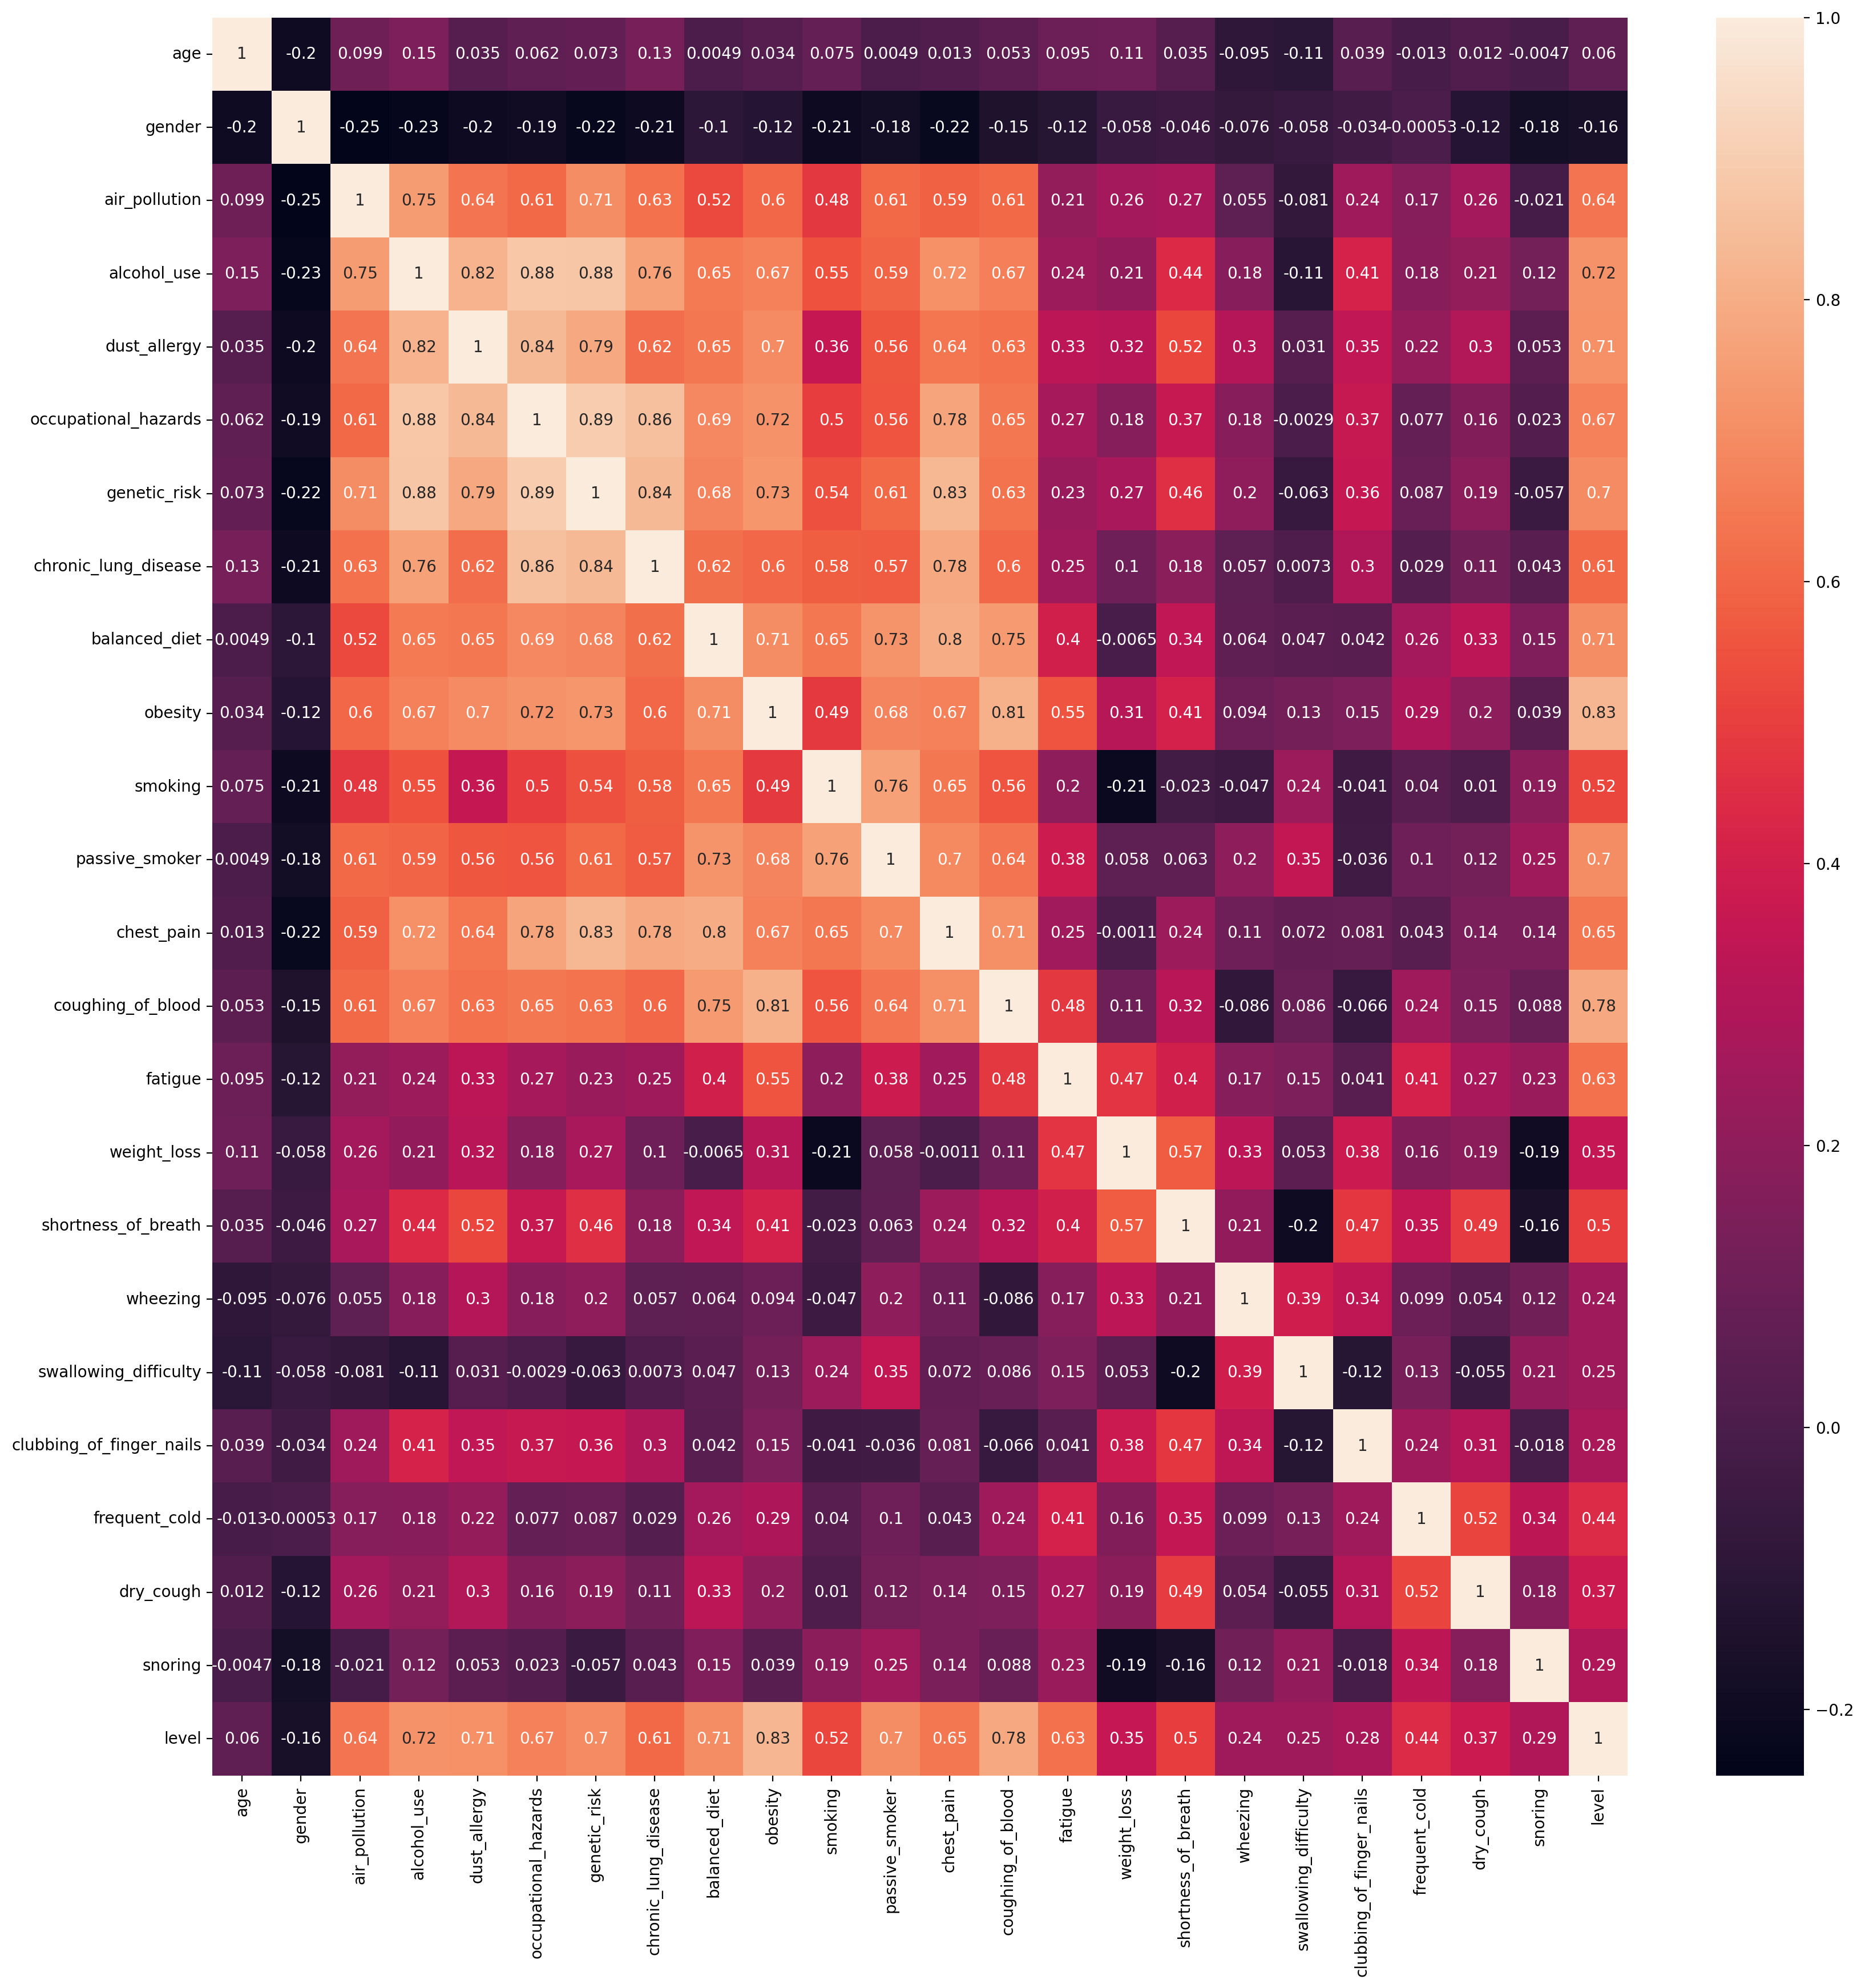

In [27]:
pl.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

## Diagrama de Violín para cada variable

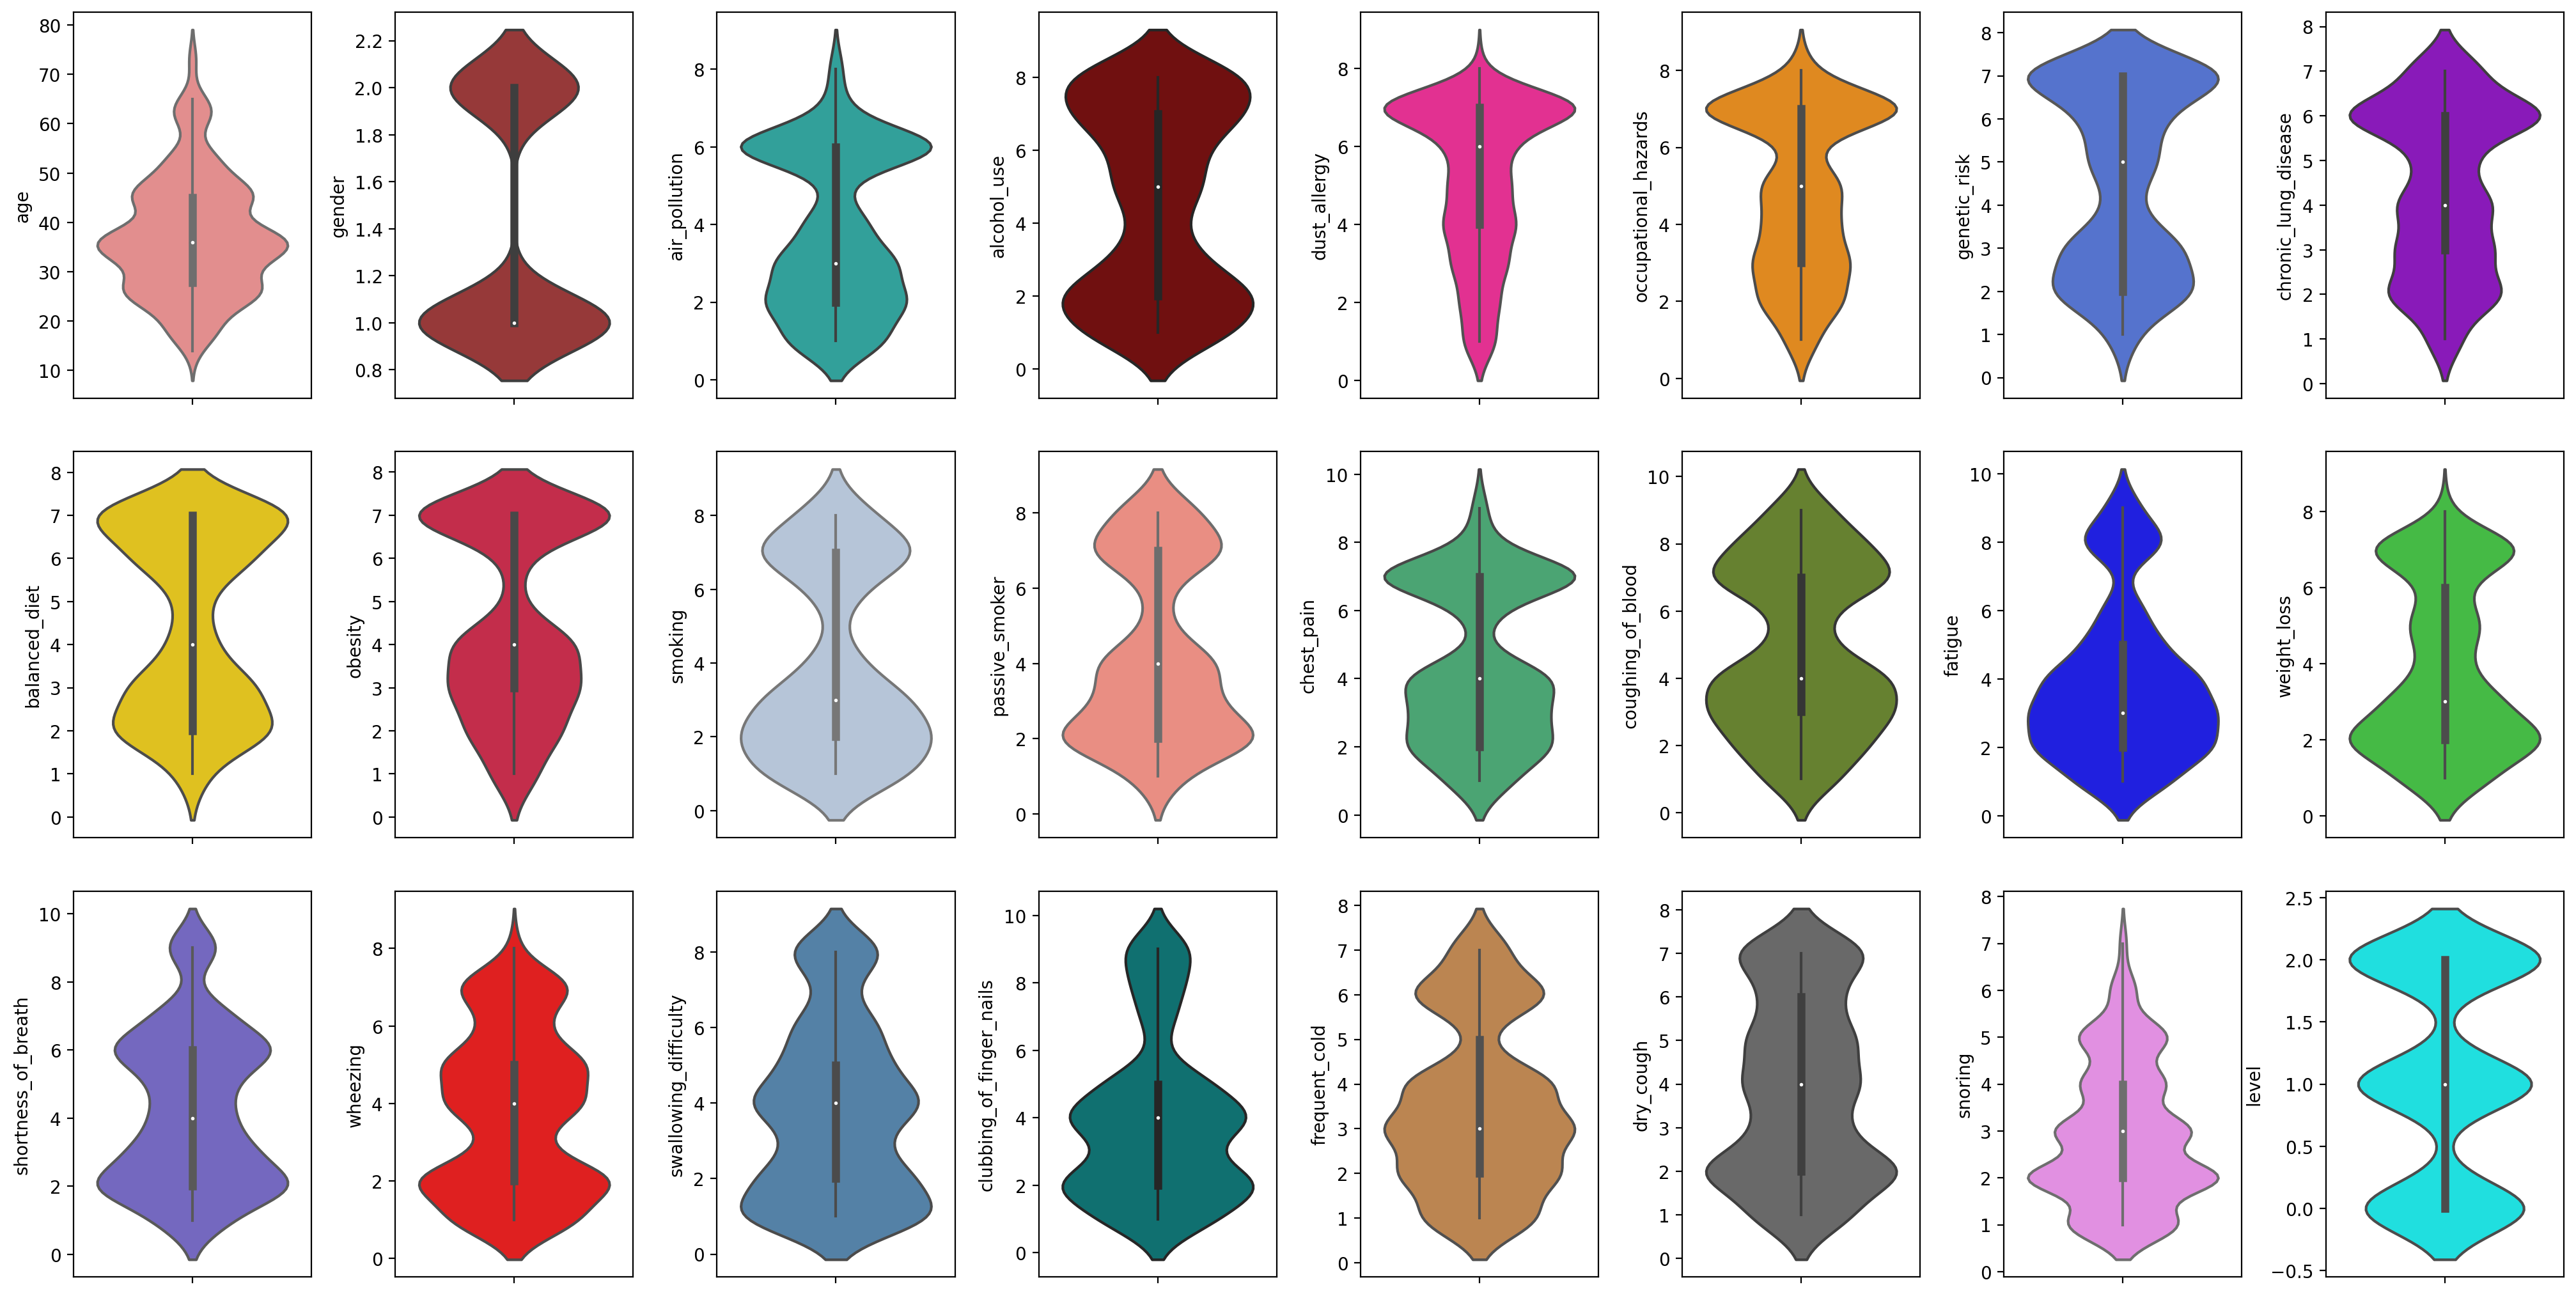

In [15]:
fig, ax = pl.subplots(ncols=8, nrows=3, figsize = (20,10))
ax = ax.flatten()
i=0

for col,_ in data.items():
    sns.violinplot(y=col, data=data, ax=ax[i], color=colors[i])
    i+=1
    
pl.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)

## Distribución de cada variable

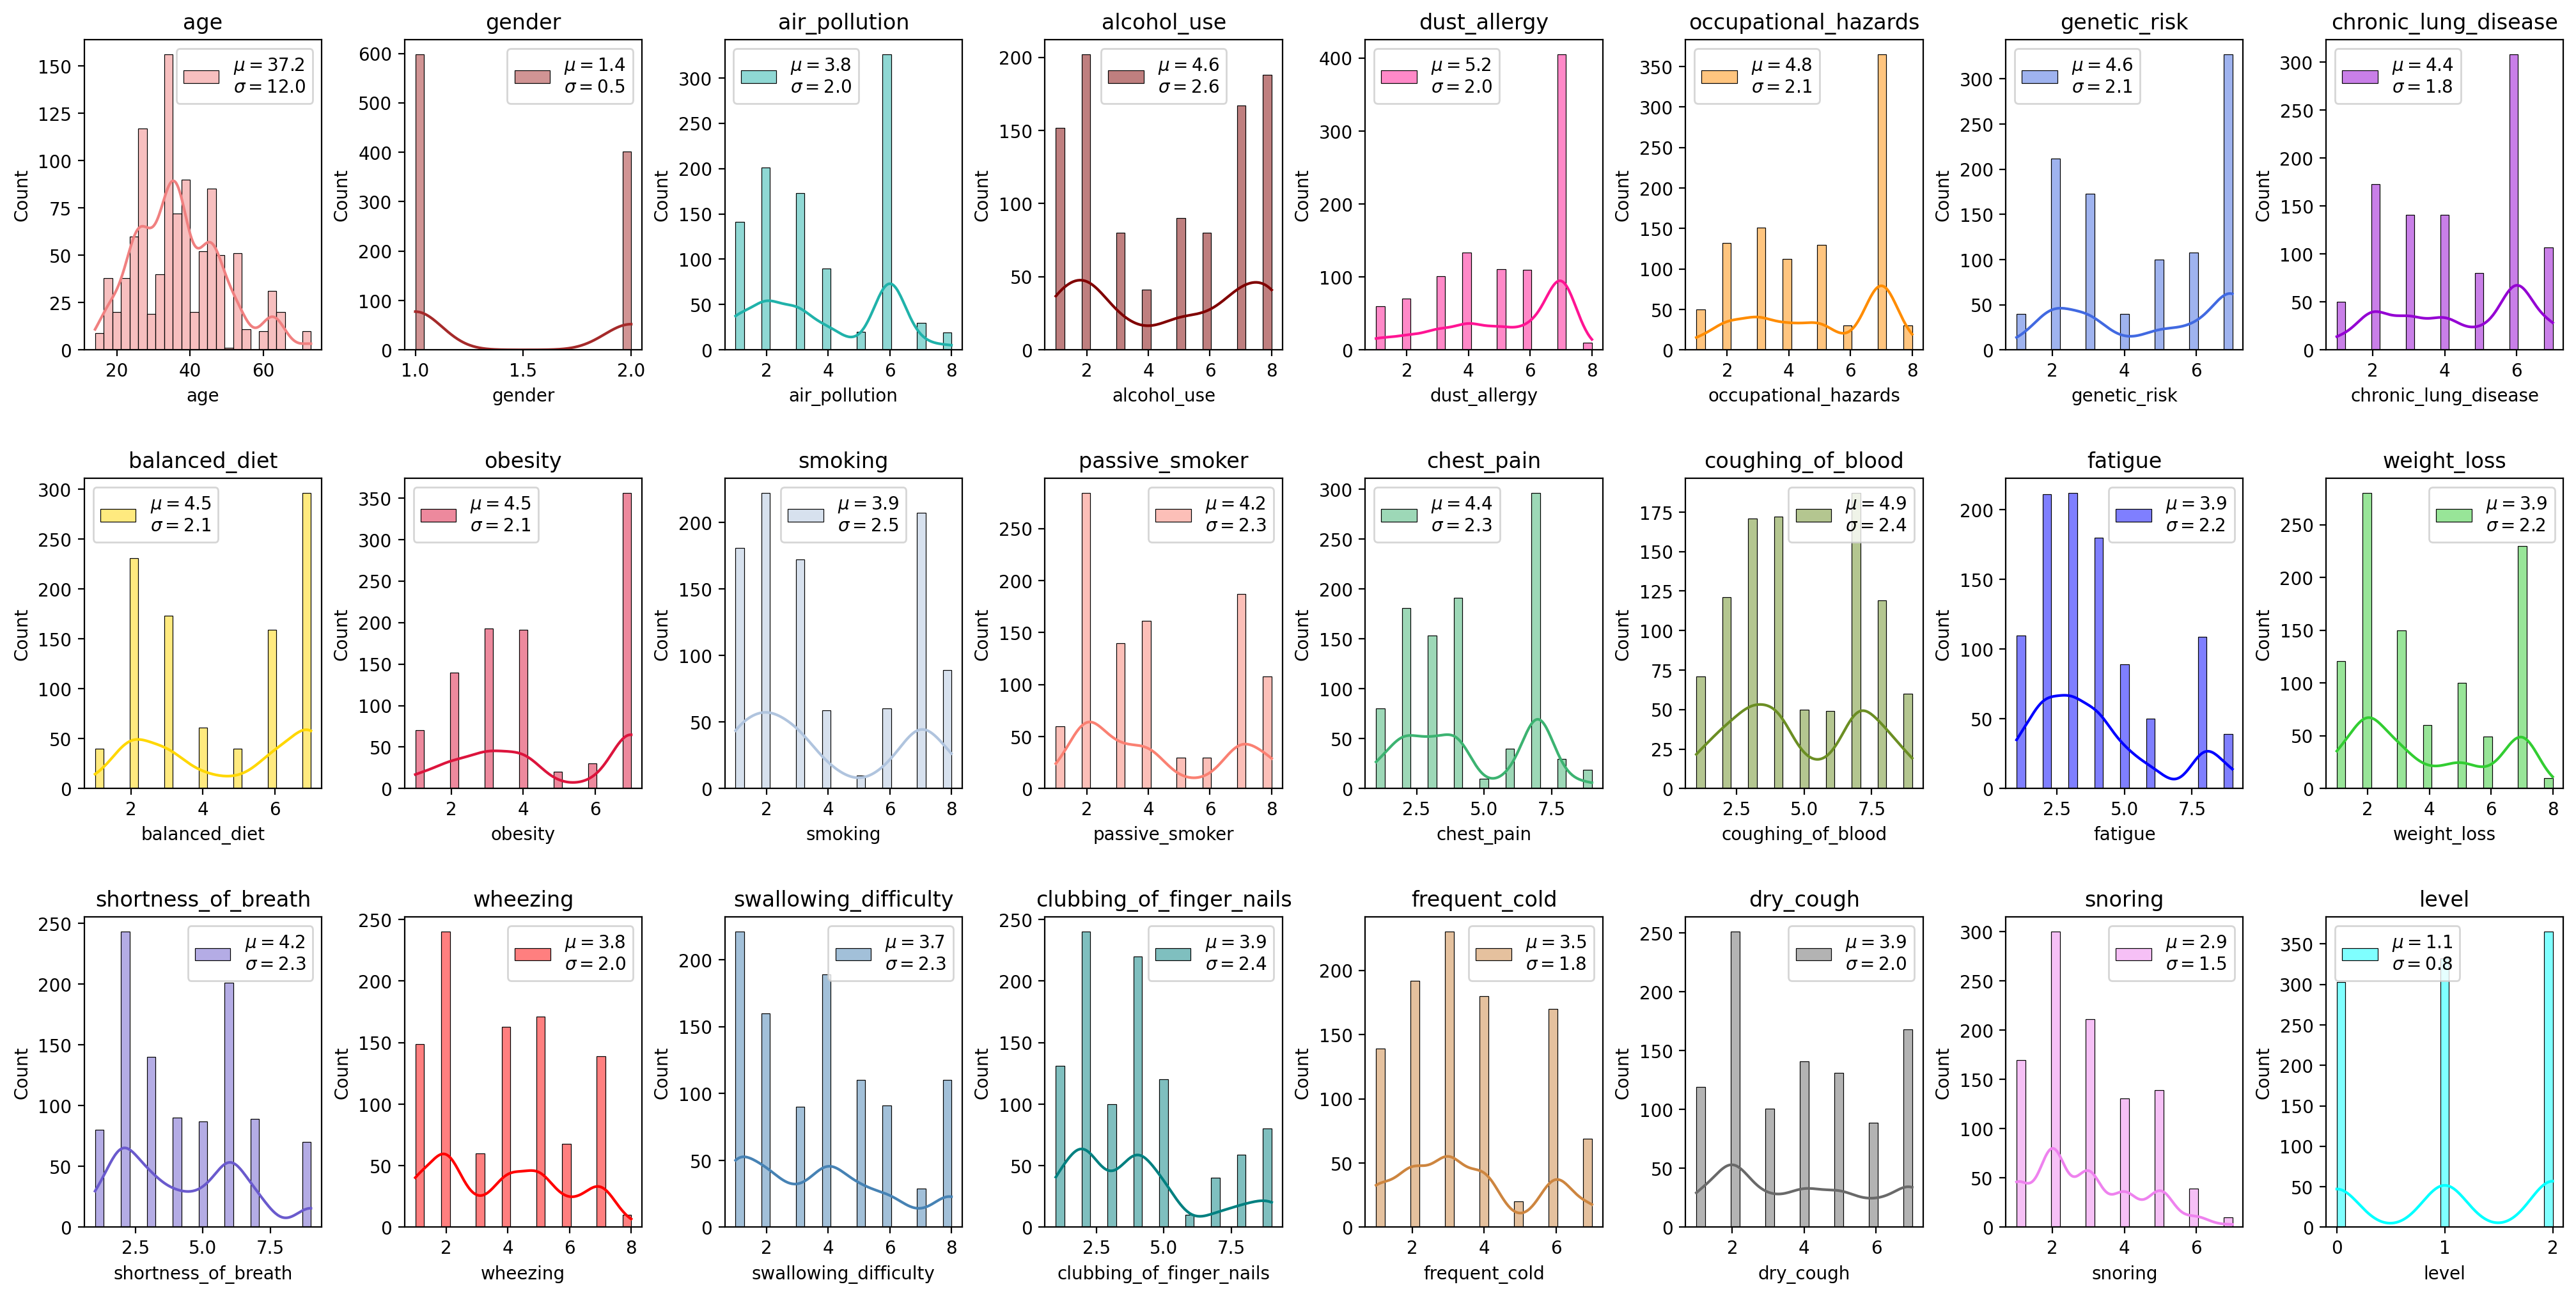

In [16]:
fig, ax = pl.subplots(ncols=8, nrows=3, figsize=(20, 10))
ax = ax.flatten()
i = 0

for k, v in data.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 color=colors[i],
                 kde=True,
                 bins=25,
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].set_title(f'{k}')
    ax[i].legend()
    i += 1
    
pl.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
pl.show()

# Dividiendo los registro de entrenamiento y prueba

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

Shapes - X Training: (700, 23) and X Testing (300, 23)
Shapes - Y Training: (700,) and Y Testing (300,)


# Regresión Logística Multinomial

In [19]:
MR = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=40)

# fitting model
MR.fit(X_train, y_train)

# predicting with model
MR_pred = MR.predict(X_test)

In [20]:
pd.Series(MR_pred).value_counts()

2    117
1     99
0     84
Name: count, dtype: int64

### Coeficientes de las variables

In [21]:
print('Intercept: \n', MR.intercept_)
print('Coefficients: \n', MR.coef_)

Intercept: 
 [ 36.71653466  -0.45261295 -36.26392171]
Coefficients: 
 [[-0.03679696  0.07868995 -0.14372791 -0.41358804 -0.28470191  0.03229035
  -0.46932196 -0.21878025 -0.03311946 -1.01589457 -0.02799344 -0.9121374
   0.28618985 -0.8342112  -0.74981177  0.03597561 -0.23744865 -0.90156423
  -0.80135017 -0.77615346 -0.64110027 -0.52194627 -0.69790158]
 [ 0.04252961 -0.14195275 -0.32681834 -0.19289663  0.41655711 -0.02792493
   0.2296596  -0.13944802 -0.30280307  0.52073573 -0.088552    0.10989805
  -0.35243518 -0.00559696 -0.09404295 -0.41793041 -0.2425131   0.72503338
  -0.04126523  0.33983854  0.21088905  0.13029258  0.41266699]
 [-0.00573265  0.06326279  0.47054626  0.60648467 -0.13185519 -0.00436542
   0.23966237  0.35822827  0.33592253  0.49515884  0.11654544  0.80223935
   0.06624533  0.83980816  0.84385472  0.3819548   0.47996175  0.17653086
   0.8426154   0.43631491  0.43021123  0.39165369  0.28523459]]


In [22]:
def CM(y_test, y_pred_test, col_names):
    
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as pl
    import numpy as np
    
    # Forming confusion matrix
    CM = confusion_matrix(y_test, y_pred_test)
    pl.figure(figsize=(12,8))
    sns.heatmap(CM, annot=True, annot_kws={'size':15}, fmt=".0f",
                cmap=pl.cm.Blues, linewidths=5)

    # labels in plot
    tick_marks = np.arange(len(col_names))
    pl.xticks(tick_marks + 0.5, col_names)
    pl.yticks(tick_marks + 0.5, col_names, rotation=0)
    pl.xlabel('Predicted label')
    pl.ylabel('True label')
    pl.title('Confusion Matrix for Random Forest Model')
    pl.show()

### Matriz de confusión del resultado del Modelo Multinomial

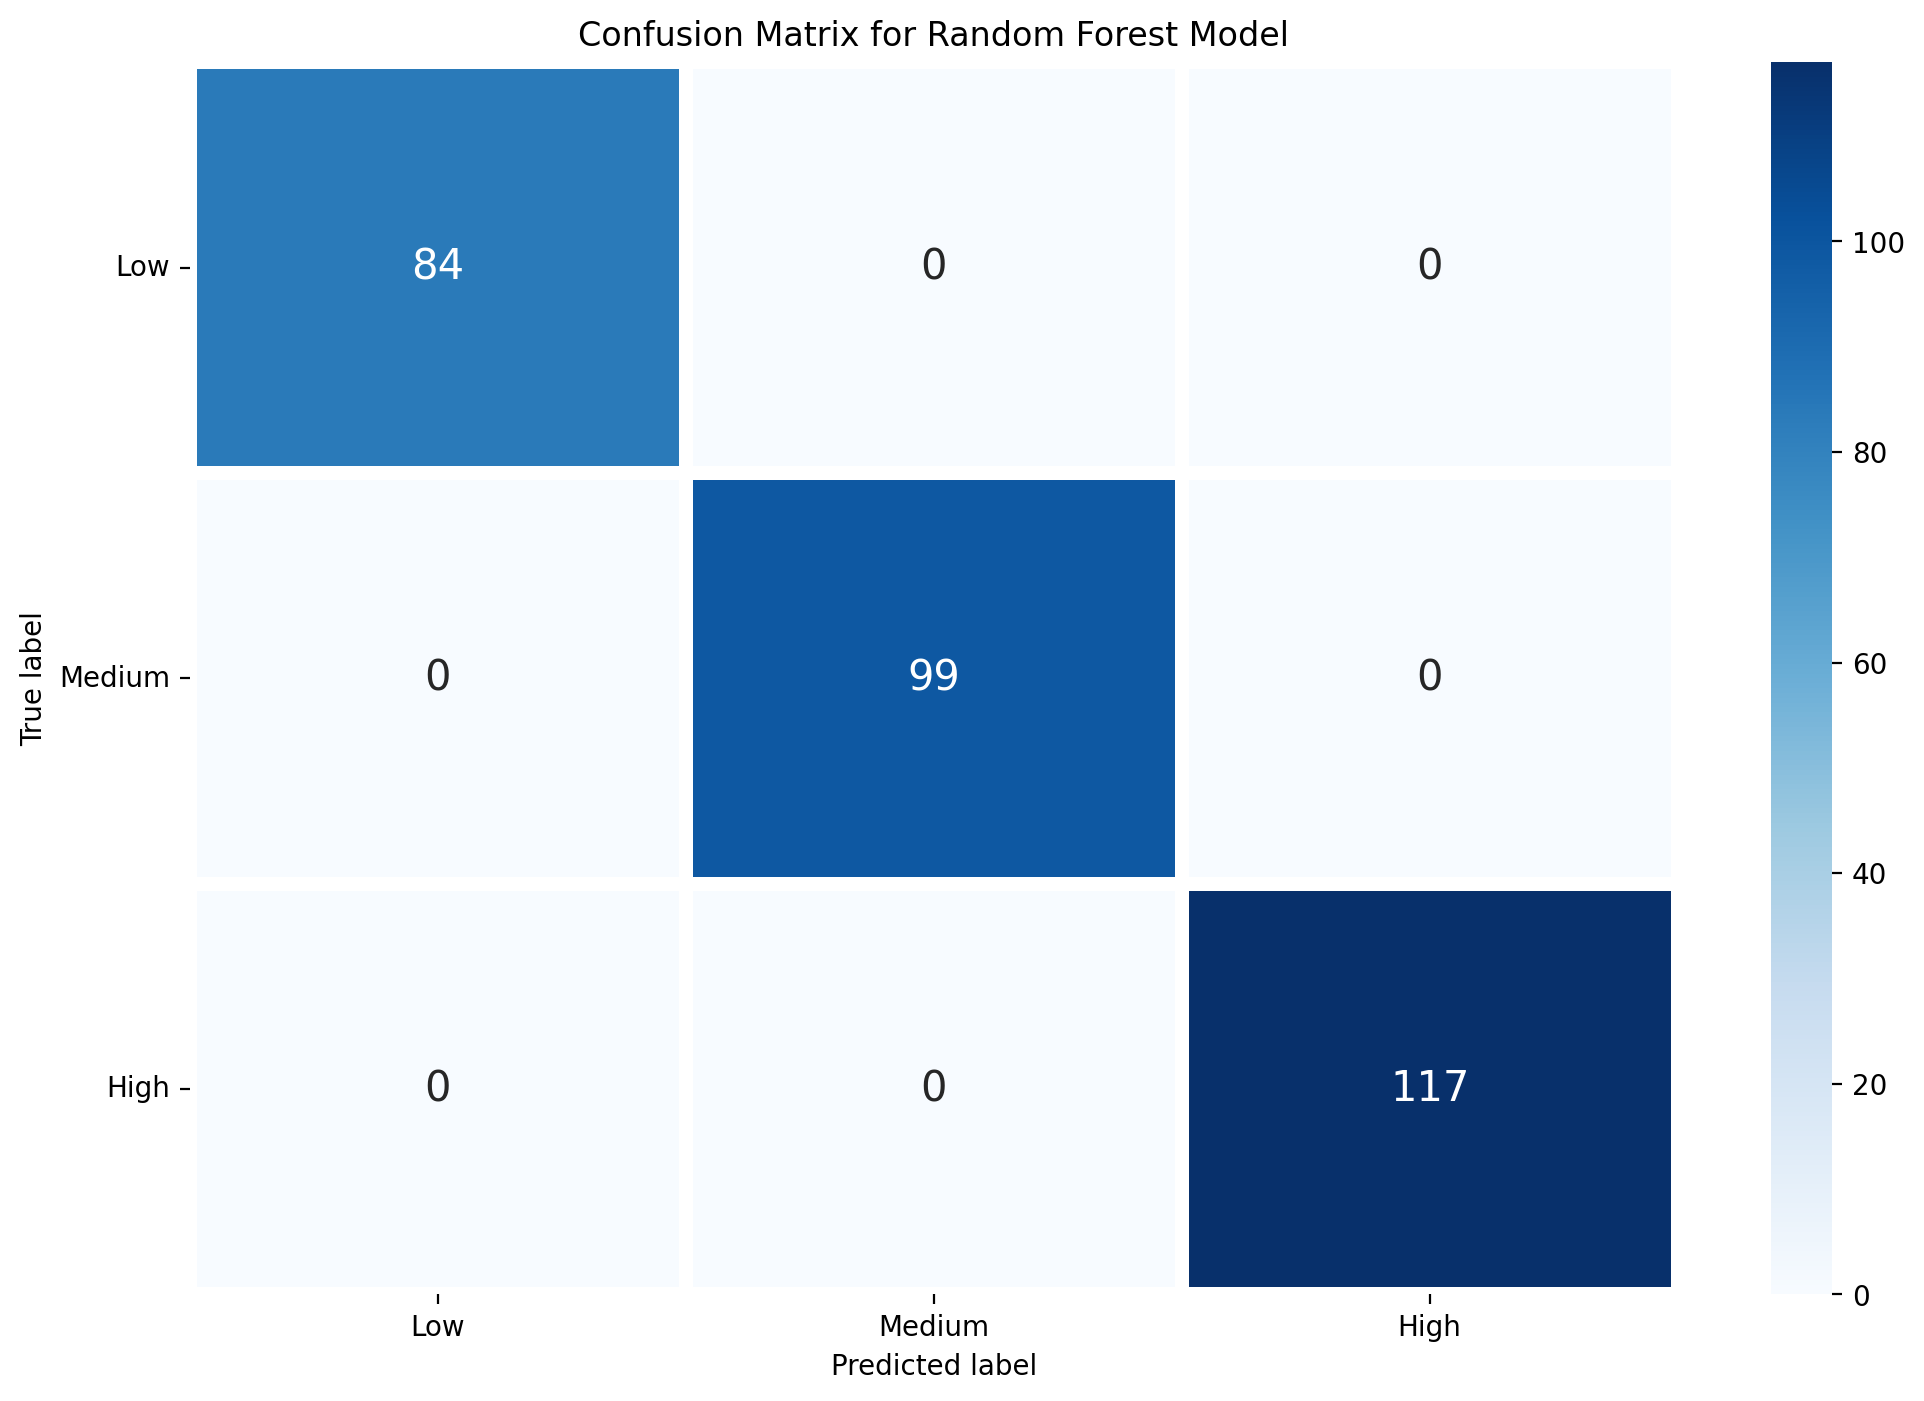

In [24]:
CM(y_test, MR_pred, col_names=['Low', 'Medium', 'High'])

### Informe de clasificación del  modelo Multinomial

In [28]:
print(classification_report(y_test, MR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



La "precision" (precisión) es la proporción de ejemplos positivos clasificados correctamente sobre el número total de ejemplos clasificados como positivos. En este caso, para todas las clases (0, 1 y 2), la precisión es del 100%, lo que indica que el modelo clasificó correctamente todos los ejemplos positivos.

El "recall" (recuperación) es la proporción de ejemplos positivos clasificados correctamente sobre el número total de ejemplos verdaderamente positivos en los datos de prueba. Nuevamente, para todas las clases, el recall es del 100%, lo que significa que el modelo identificó todos los ejemplos positivos correctamente.

El "f1-score" es una medida combinada de la precisión y el recall, que se calcula como la media armónica de ambos. En este caso, el f1-score también es del 100% para todas las clases.

La columna "support" muestra el número de ejemplos verdaderos de cada clase en los datos de prueba.

El "accuracy" (exactitud) general del modelo es del 100%, lo que indica que clasificó correctamente el 100% de los ejemplos en el conjunto de prueba.

En resumen, los resultados indican que este modelo de regresión logística multinomial ha logrado un rendimiento perfecto en la clasificación de las tres categorías, con una precisión, recall y f1-score del 100% para cada clase. Sin embargo, debemos tener en cuenta que estos resultados son específicos de la muestra de datos utilizada para la evaluación y podrían variar en otros conjuntos de datos.

 # Random Forest Classifier Regression

In [ ]:
def random_forest_n_best(X_train, y_train, X_test, y_test, n_list):
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    
    scores = []
    
    for n in n_list:
        RF = RandomForestClassifier(n_estimators=n, random_state=40)
        RF.fit(X_train, y_train)
        RF_pred = RF.predict(X_test)

        scores.append(accuracy_score(y_test, RF_pred))

    pl.plot(n_list, scores)
    pl.xlabel('Value of n_estimators for Random Forest Classifier')
    pl.ylabel('Testing Accuracy')
        

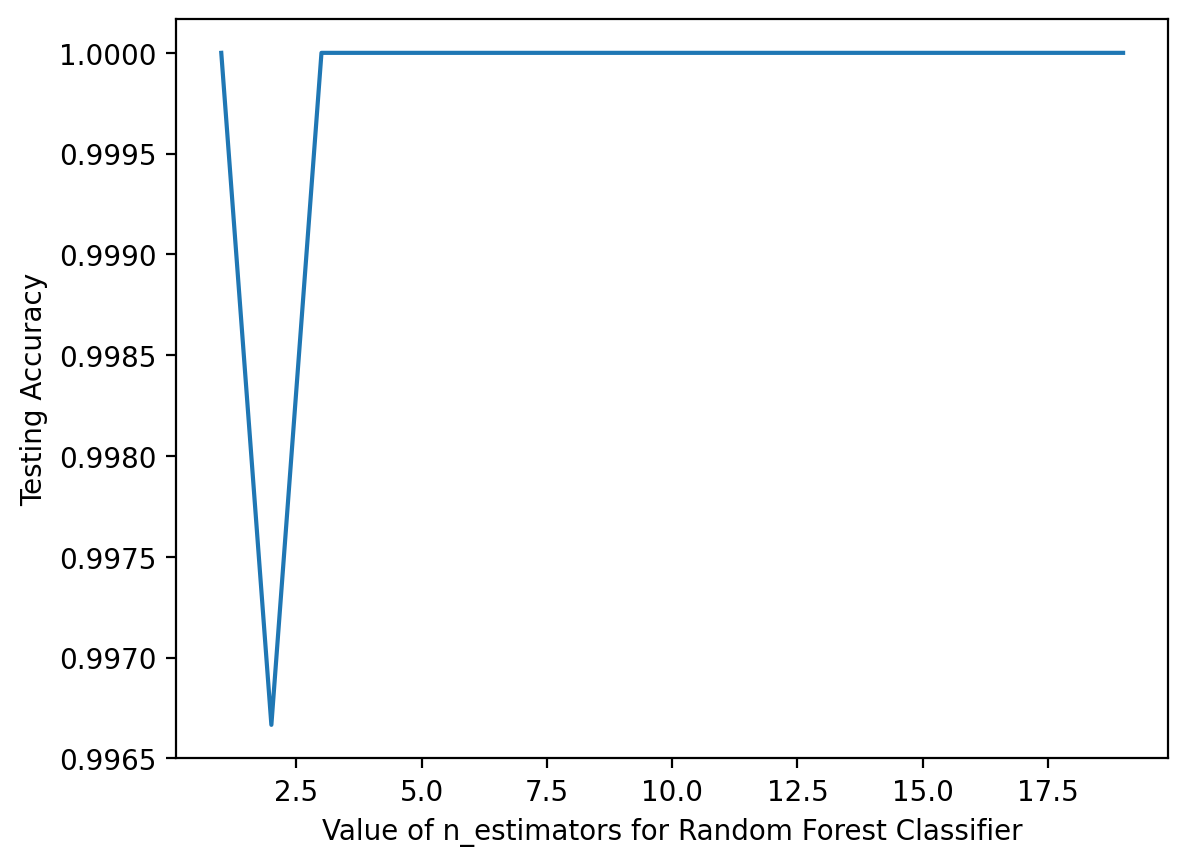

In [30]:
random_forest_n_best(X_train, y_train, X_test, y_test, n_list=np.arange(1,20,1))

Acá se determina el número óptimo de estimadores (árboles) que el modelo Random Forest utilizará como estrategia de búsqueda exhaustiva sobre la lista de valores proporcionados en la lista n. Se identificará al estimador que maximice el rendimiento del modelos en los datos de prueba y obtendremos un modelo más óptimo para su uso en la clasificación de nuevos datos.

In [32]:
# Defino el modelo y conjunto aleatorio:
RF = RandomForestClassifier(n_estimators=3, random_state=40)

# Ajuste del modelo:
RF.fit(X_train, y_train)

# Predicción del modelo:
RF_pred = RF.predict(X_test)

In [33]:
pd.Series(RF_pred).value_counts()

2    117
1     99
0     84
Name: count, dtype: int64

## Matriz de confusión del modelo Random Forest Classifier

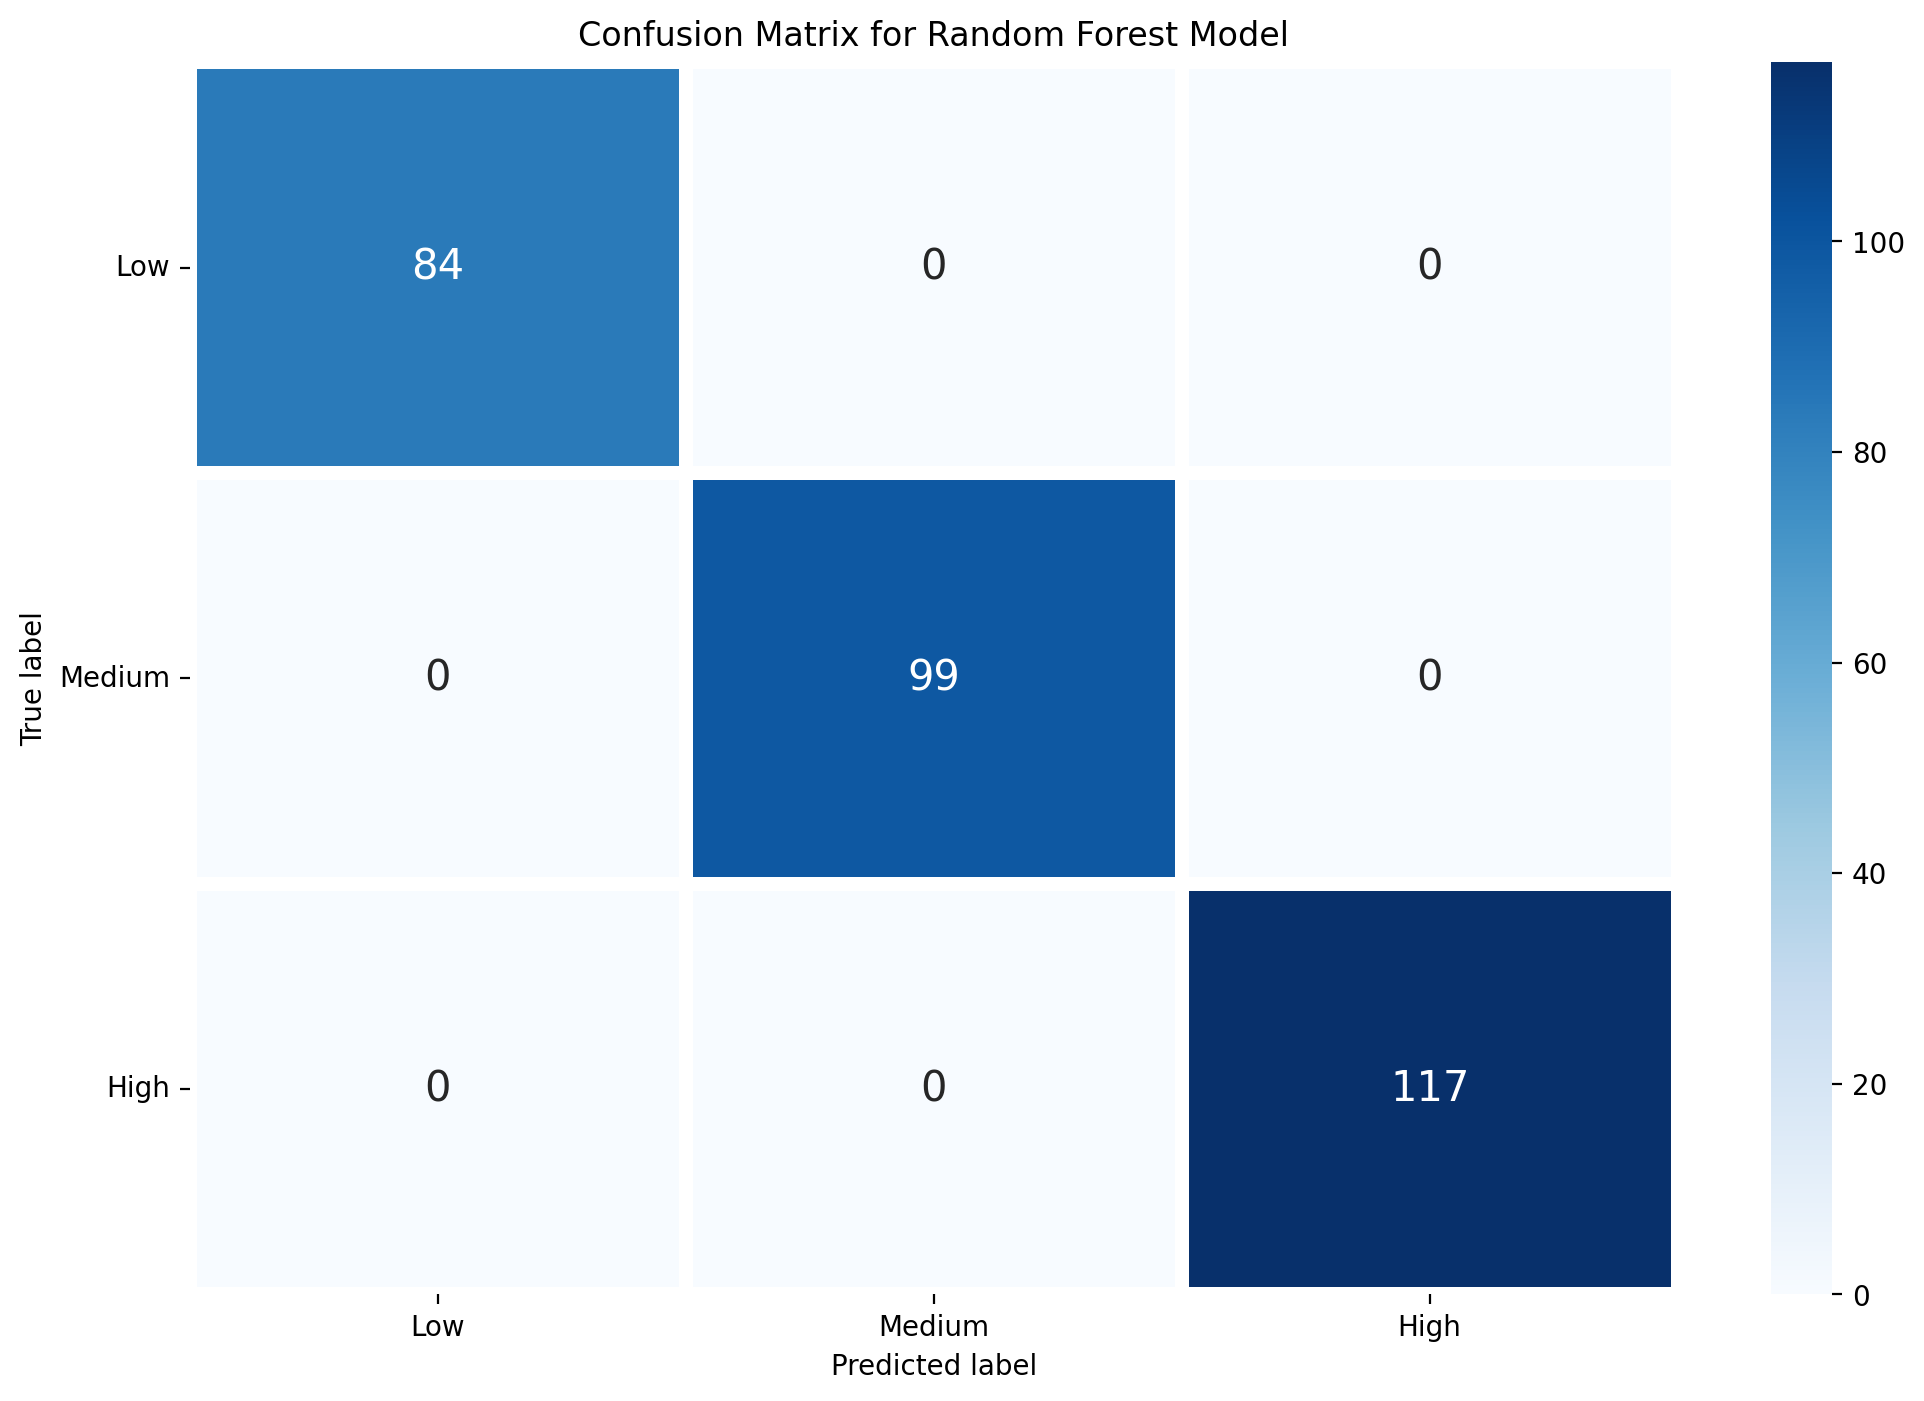

In [34]:
CM(y_test, RF_pred, col_names=['Low', 'Medium', 'High'])

### Random Forest Classifier Plot

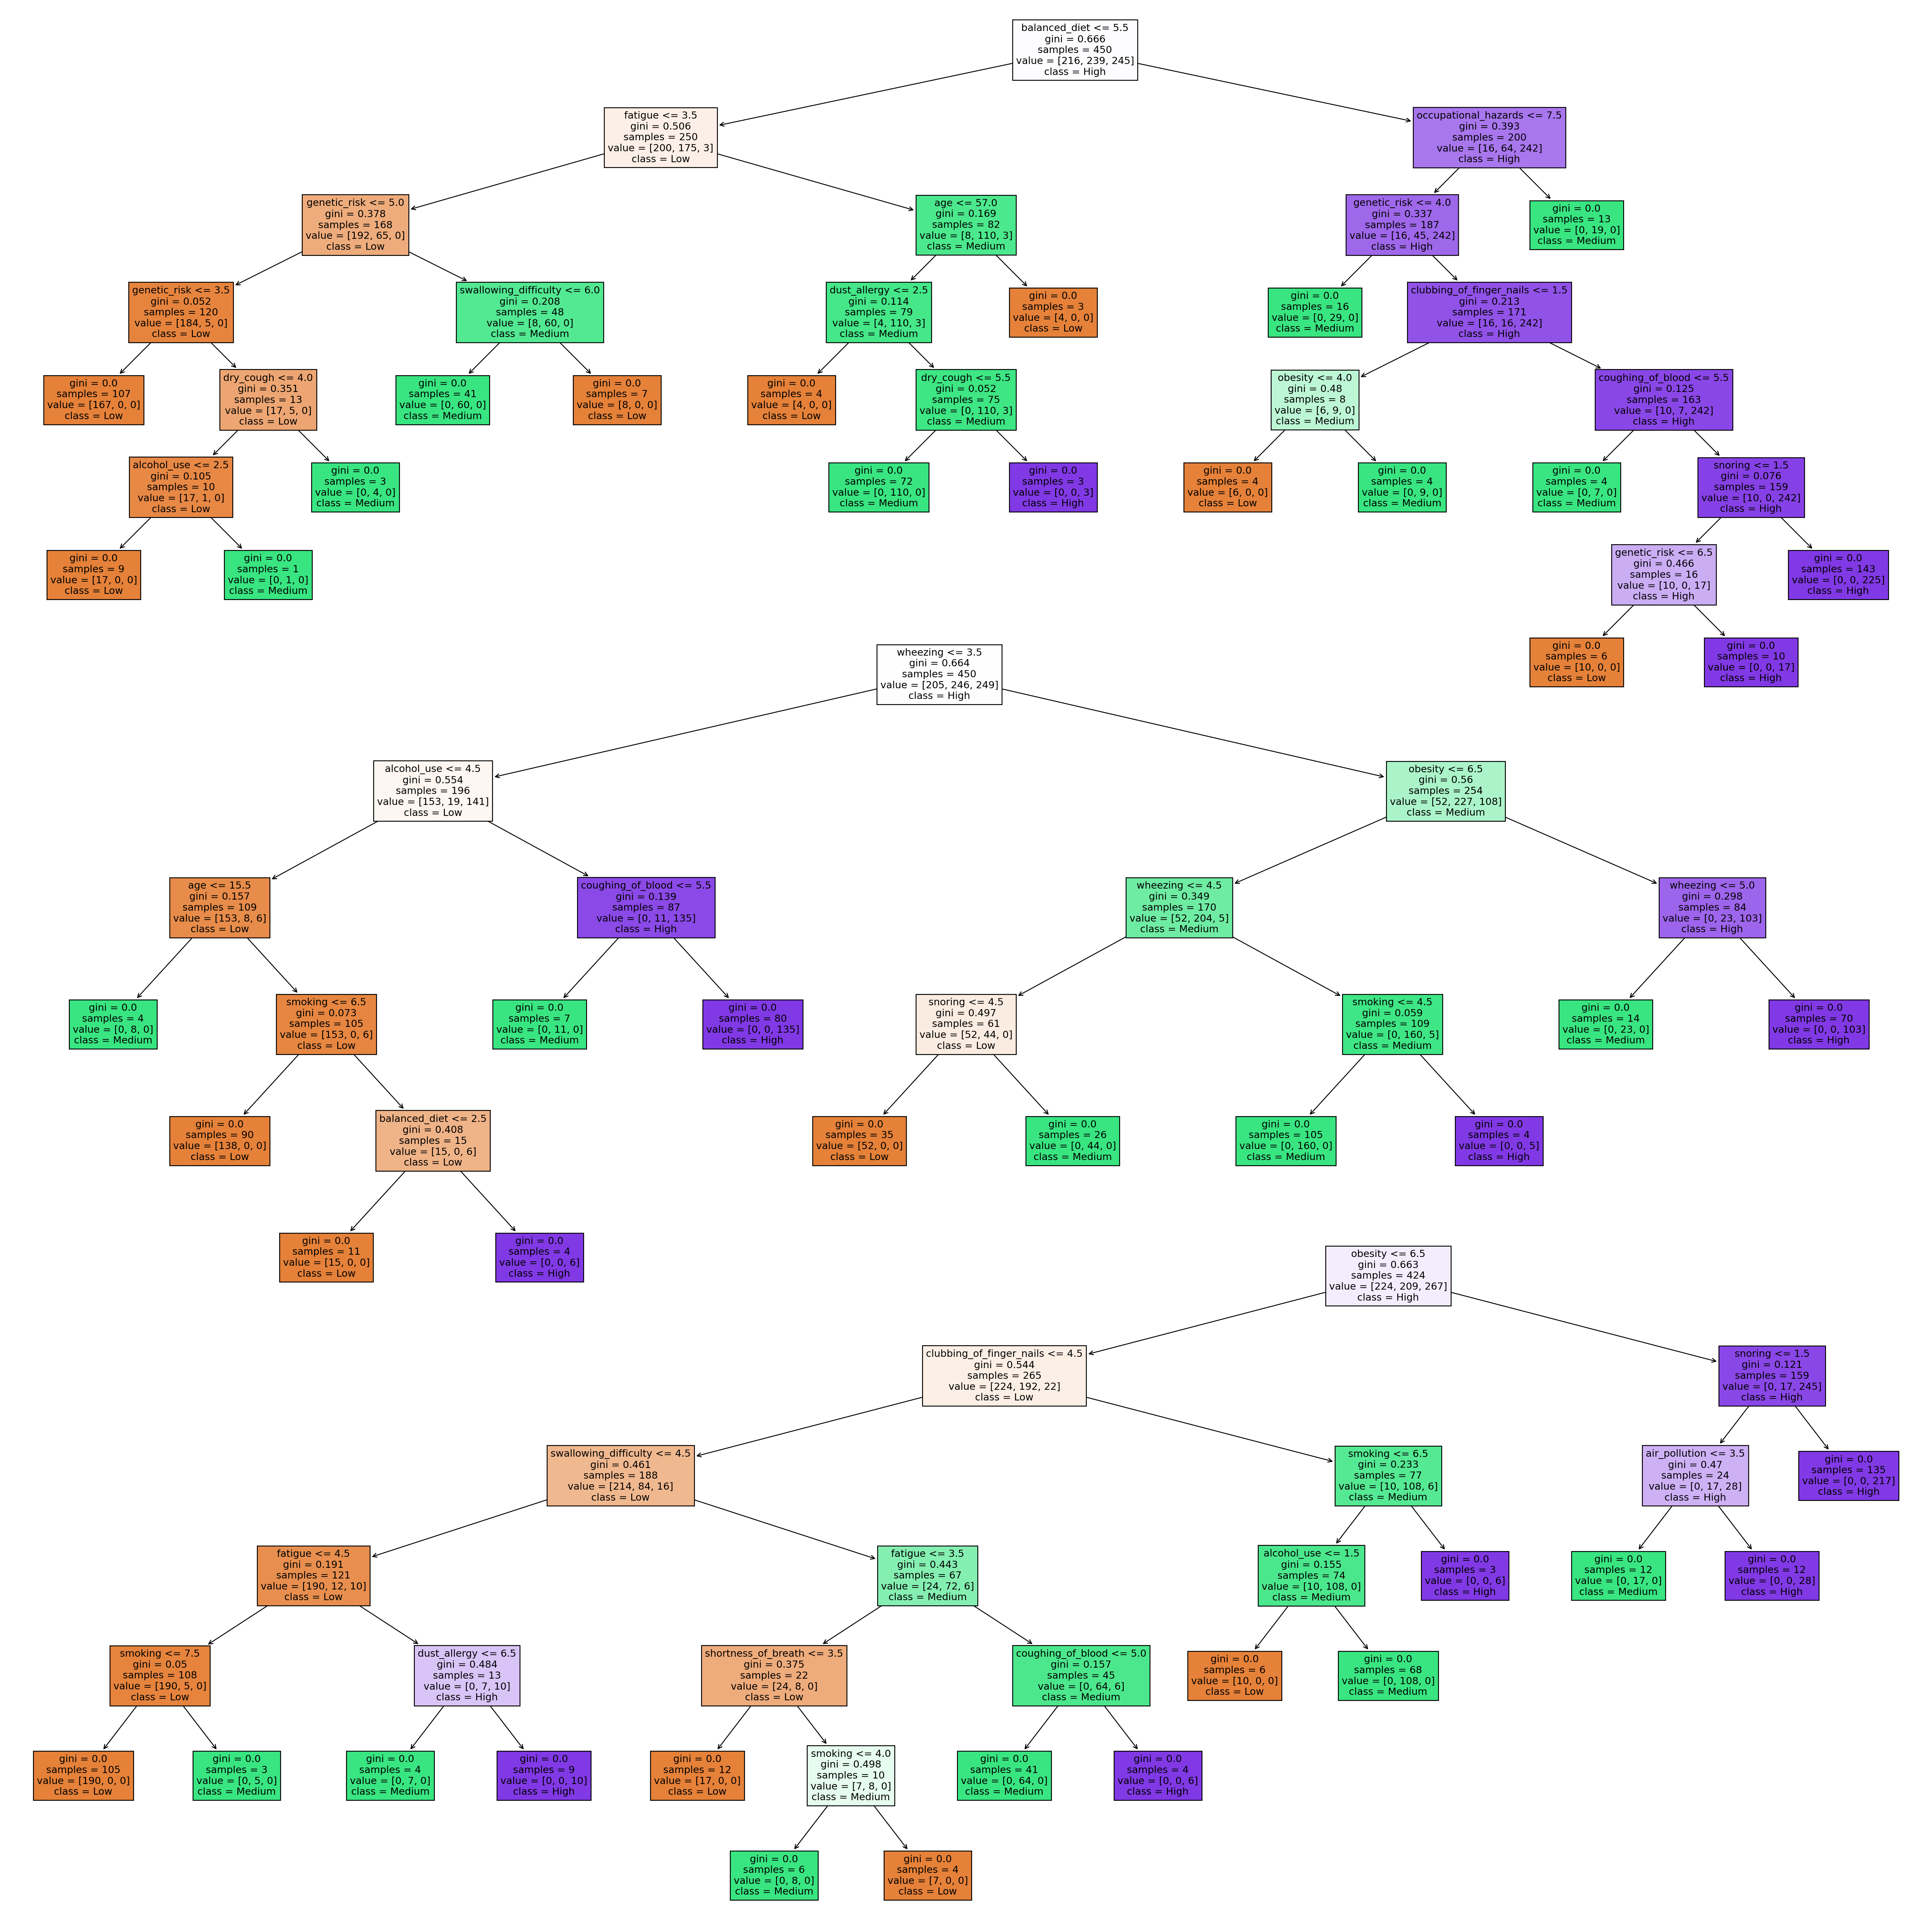

In [36]:
from sklearn import tree

trees = len(RF.estimators_)
cn = ['Low', 'Medium', 'High']

fig, ax = pl.subplots(trees, 1, figsize=(30,10*trees))

for i, forest in enumerate(RF.estimators_):
    if trees > 1:
        tree.plot_tree(forest,
                       feature_names=x.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11,
                       ax=ax[i])
    else:
        tree.plot_tree(forest,
                       feature_names=x.columns,
                       class_names=cn,
                       filled=True,
                       fontsize=11)
    
pl.tight_layout(h_pad=-10)
pl.show()

### Reporte de la clasificación del Modelo Random Forest

In [37]:
# View the classification report for test data and predictions
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



"precision" (precisión): Para cada una de las tres categorías (0, 1 y 2), la precisión es del 100%. Esto significa que el modelo clasificó correctamente todos los ejemplos positivos para cada clase en los datos de prueba. En otras palabras, no hubo falsos positivos en ninguna de las categorías.

"recall" (recuperación): Al igual que la precisión, el recall es del 100% para todas las categorías. Esto indica que el modelo identificó correctamente todos los ejemplos positivos para cada clase en los datos de prueba. En resumen, no hubo falsos negativos para ninguna de las categorías.

"f1-score": El f1-score es una medida combinada de la precisión y el recall. También es del 100% para todas las categorías. Esto indica que el modelo tuvo un rendimiento perfecto al clasificar las tres categorías en los datos de prueba.

"support": La columna "support" muestra el número de ejemplos verdaderos de cada clase en los datos de prueba. Para la categoría 0, hay 84 ejemplos; para la categoría 1, hay 99 ejemplos; y para la categoría 2, hay 117 ejemplos.

"accuracy" (exactitud): La exactitud general del modelo es del 100%, lo que significa que clasificó correctamente el 100% de los ejemplos en el conjunto de prueba.

En resumen, los resultados indican que tu modelo de Random Forest ha logrado un rendimiento perfecto en la clasificación de las tres categorías, con una precisión, recall y f1-score del 100% para cada clase. Además, la exactitud general del modelo también es del 100%. Estos resultados sugieren que el modelo es muy bueno en la clasificación de los ejemplos en el conjunto de prueba y es capaz de distinguir de manera precisa y completa las tres categorías en el problema.